In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
train_redu = pd.read_csv('dataset/train_redu.csv')
test_redu = pd.read_csv('dataset/test_redu.csv')

x_train = [(x,y) for x, y in zip(train_redu['intensidade'], train_redu['simetria'])]
y_train = train_redu['label']

x_test = [(x,y) for x, y in zip(test_redu['intensidade'], test_redu['simetria'])]
y_test = test_redu['label']

In [94]:
#transformando em vetor para poder aplicar metodos
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.T
x_test = x_test.T
y_test = y_test.reshape(1, -1)
y_train = y_train.reshape(1, -1)

In [95]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2, 2186)
Shape of y_train :  (1, 2186)
Shape of x_test :  (2, 1115)
Shape of y_test :  (1, 1115)


### 1 x todos

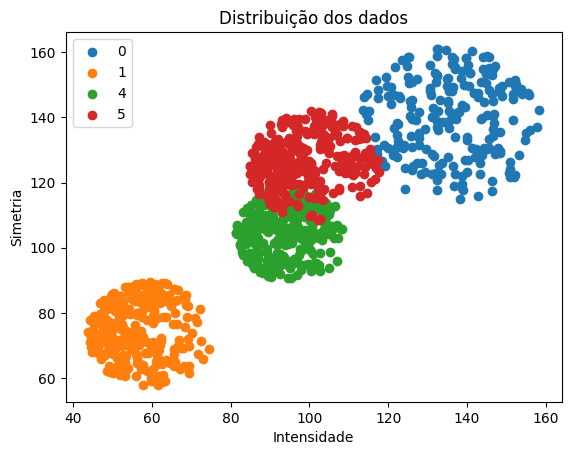

In [96]:
filtrado = test_redu[test_redu['label'].isin([0, 1, 4, 5])]

label_0 = filtrado[filtrado['label'] == 0]
label_1 = filtrado[filtrado['label'] == 1]
label_4 = filtrado[filtrado['label'] == 4]
label_5 = filtrado[filtrado['label'] == 5]

plt.scatter(label_0['intensidade'], label_0['simetria'], label='0')
plt.scatter(label_1['intensidade'], label_1['simetria'], label='1')
plt.scatter(label_4['intensidade'], label_4['simetria'], label='4')
plt.scatter(label_5['intensidade'], label_5['simetria'], label='5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [97]:
y_train_0 = pd.Series(y_train.flatten()).replace({0: 0, 1: 1, 4: 1, 5: 1})

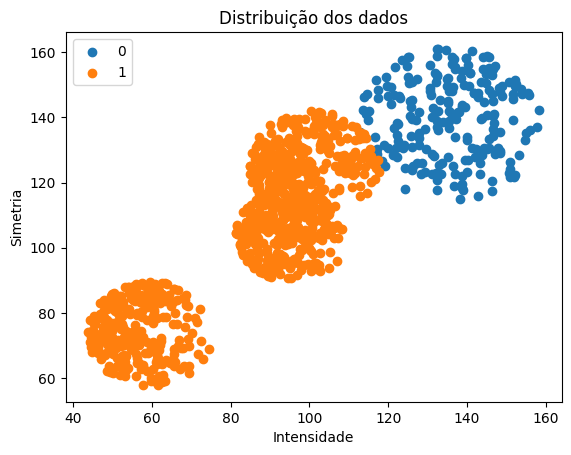

In [98]:
test_redu_0 = test_redu.replace({0: 0, 1: 1, 4: 1, 5: 1})

filtrado_0 = test_redu_0[test_redu_0['label'].isin([0, 1])]

label_0 = filtrado_0[filtrado_0['label'] == 0]
label_1 = filtrado_0[filtrado_0['label'] == 1]

plt.scatter(label_0['intensidade'], label_0['simetria'], label='0')
plt.scatter(label_1['intensidade'], label_1['simetria'], label='1')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

### Funções

In [99]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

In [100]:
def acuracia(y, pred, conjunto):

    total = len(y[0])

    acertos = 0

    for i in range(total):
        if pred[0][i] == y[0][i]:
            acertos += 1
    
    print(f"Acuracia do modelo no conjunto {conjunto}: ", (acertos/total)*100, "%")

In [101]:
def regressao_logistica(X, Y, titulo, learning_rate = 0.0015, iterations = 100000):
    
    #numero de amostras
    m = x_train.shape[1]
    
    #numero de features
    n = x_train.shape[0]
    
    #matriz de pesos
    W = np.zeros((n,1))

    #bias
    B = 0
    
    cost_list = []

    print(f'para o conjunto de {titulo}')
    print('')
    
    for i in range(iterations):
        
        #forward propagation
        Z = np.dot(W.T, X) + B

        #sigmoid
        A = sigmoide(Z)

        #custo
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        #gradiente descendente
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        #historico de custo
        cost_list.append(cost)
        

        if(i%(iterations/10) == 0):
            print(f"custo depois de {i} iterações:", cost)


    print('')
    #predições    
    Z_final = np.dot(W.T, X) + B
    A_final = sigmoide(Z_final)
    
    y_pred = np.where(A_final >= 0.5, 1, 0)

    return W, B, cost_list, y_pred
        

In [102]:
y_train_0 = np.array(y_train_0)

In [103]:
W, B, hist_custo, y_pred_treino = regressao_logistica(x_train, y_train_0, 'treino')

para o conjunto de treino

custo depois de 0 iterações: 0.6931471805599453
custo depois de 10000 iterações: 0.9776457193304061
custo depois de 20000 iterações: 0.950847186320478
custo depois de 30000 iterações: 0.9244135919497496
custo depois de 40000 iterações: 0.898353187698356
custo depois de 50000 iterações: 0.8726826520505488
custo depois de 60000 iterações: 0.8474275152243553
custo depois de 70000 iterações: 0.822621127448705
custo depois de 80000 iterações: 0.7983026952765092
custo depois de 90000 iterações: 0.774514762457764



In [104]:
pred_0 = y_pred_treino[y_pred_treino == 0]
pred_1 = y_pred_treino[y_pred_treino == 1]

print('pred_0:', len(pred_0), 'pred_1:', len(pred_1), '. Total:', len(y_pred_treino[0]))

pred_0: 81 pred_1: 2105 . Total: 2186


In [105]:
df_x_train = pd.DataFrame(np.array(x_train).T, columns=['intensidade', 'simetria'])
df_x_train

,intensidade,simetria
0,145.435294,148.572549
1,118.576471,137.113725
2,127.600000,134.047059
3,138.047059,151.003922
4,146.215686,122.501961
...,...,...
2181,105.705882,133.890196
2182,113.070588,116.698039
2183,110.745098,133.019608
2184,99.325490,132.133333


In [106]:
df_y_pred_treino = pd.DataFrame(y_pred_treino.reshape(-1, 1), columns=['label'])

df_y_pred_treino

,label
0,1
1,1
2,1
3,1
4,0
...,...
2181,1
2182,1
2183,1
2184,1


In [111]:
x_train_1 = []

for i in range(len(y_pred_treino[0])):
    if y_pred_treino[0][i] == 1:
        x_train_1.append((df_x_train.iloc[i]).values)

len(x_train_1)

2105

In [113]:
W_1, B_1, hist_custo_1, y_pred_treino_1 = regressao_logistica(x_train_1, pred_1, 'treino')

array([1, 1, 1, ..., 1, 1, 1])

### Vizualização Gráfica

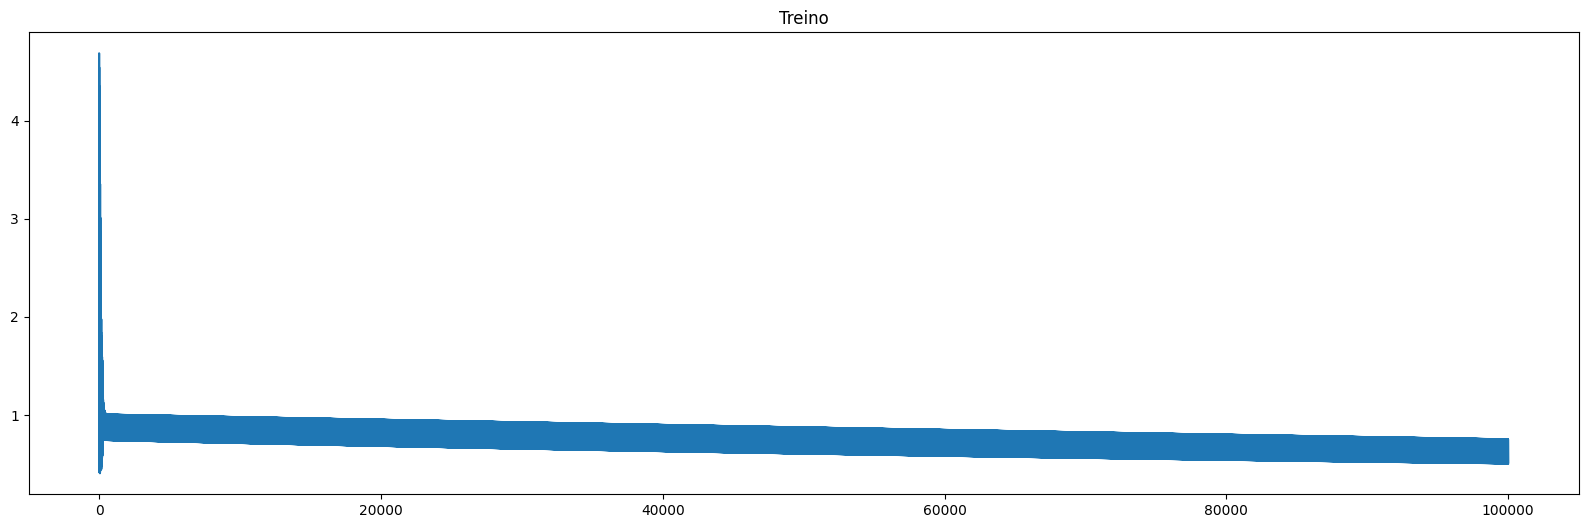

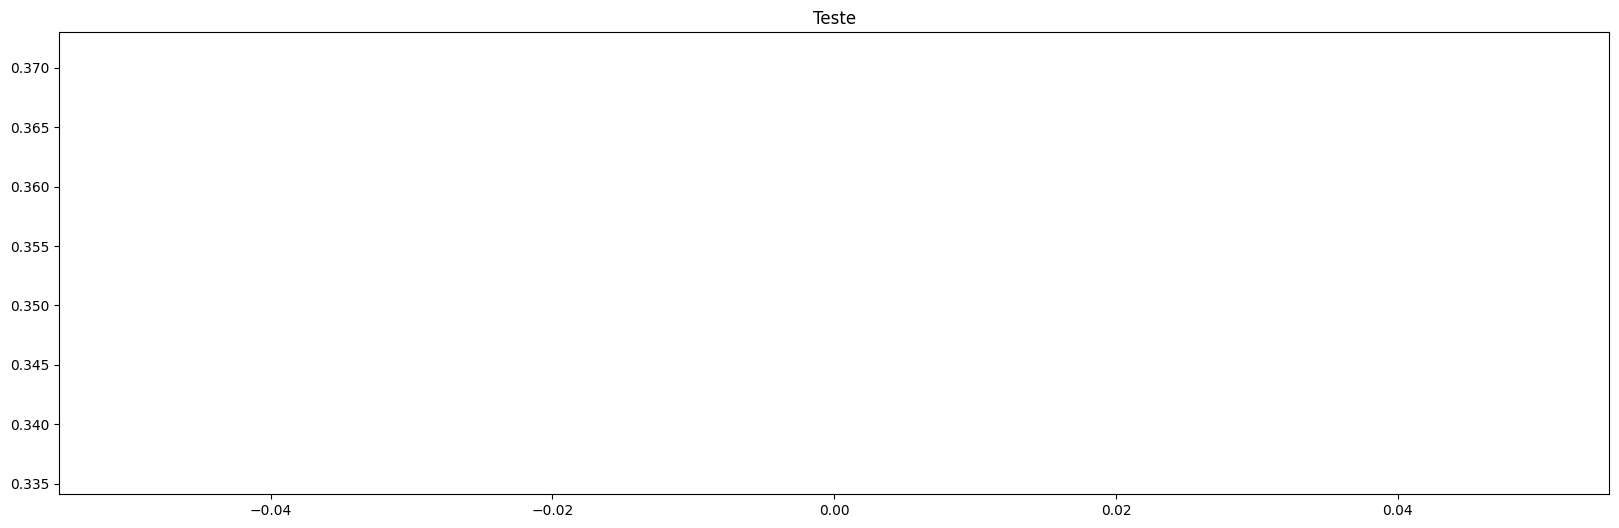

In [20]:
iteracoes = 100000

plt.figure(figsize=(20,6))
plt.title('Treino')
plt.plot(np.arange(iteracoes), hist_custo)
plt.show()

plt.figure(figsize=(20,6))
plt.title('Teste')
plt.plot(np.arange(iteracoes), hist_custo_test)
plt.show()

In [21]:
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_test == 1))

425
292


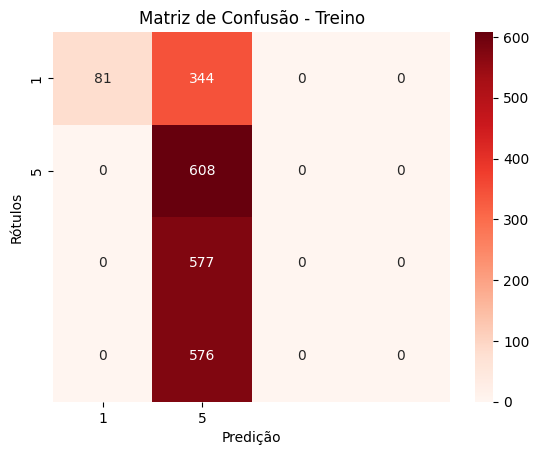

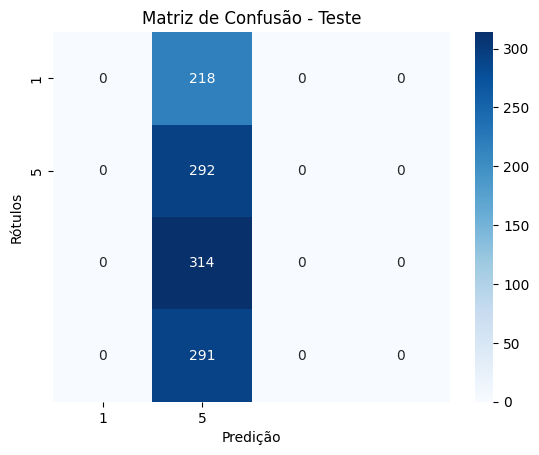

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#convertendo em vetores 1D
y_train_f = y_train.flatten()
y_pred_treino_f = y_pred_treino.flatten()

y_test_f = y_test.flatten()
y_pred_teste_f = y_pred_teste.flatten()

cm = confusion_matrix(y_train_f, y_pred_treino_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Treino')
plt.show()

cm_test = confusion_matrix(y_test_f, y_pred_teste_f)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Teste')
plt.show()


In [23]:
from sklearn.metrics import precision_recall_curve, classification_report

report = classification_report(y_train_f, y_pred_treino_f)
#precisão x sensibilidade*
precision, recall, _ = precision_recall_curve(y_train_f, y_pred_treino_f)

print(report)

plt.plot(recall, precision)
plt.title('Curva de Precisão - Treino')
plt.show()



report_test = classification_report(y_test_f, y_pred_teste_f)

precision_test, recall_test, _ = precision_recall_curve(y_test_f, y_pred_teste_f)

print(report_test)

plt.plot(recall_test, precision_test)
plt.title('Curva de Precisão - Teste')
plt.show()

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

ValueError: multiclass format is not supported

### Eficiência da Classificação

In [ ]:
acuracia(y_train, y_pred_treino, "teste")

acuracia(y_test, y_pred_teste, "treino")

Acuracia do modelo no conjunto teste:  100.0 %
Acuracia do modelo no conjunto treino:  100.0 %


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Metricas de Erro - Treino')
print("Erro médio quadrático: ", mean_squared_error(y_train, y_pred_treino))
print("Erro médio absoluto: ", mean_absolute_error(y_train, y_pred_treino))

print('')
print('Metricas de Erro - Teste')
print("Erro médio quadrático: ", mean_squared_error(y_test, y_pred_teste))
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred_teste))

Metricas de Erro - Treino
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0

Metricas de Erro - Teste
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0
